<a href="https://colab.research.google.com/github/Ewallk/Fixacao/blob/main/machine_learning_alta_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

exames = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
exames.shape

(569, 35)

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = exames.drop(columns=['id', 'diagnostico'])
diagnostico = exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [ ]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.022130,0.03259,0.010400,0.017080,0.003806,9.628,19.62,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.580,0.005768,0.008082,0.01510,0.006451,0.013470,0.001828,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.740,0.008902,0.047850,0.07339,0.017450,0.027280,0.007610,11.690,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,0.3538,1.1300,2.388,19.630,0.015460,0.025400,0.02197,0.015800,0.039970,0.003901,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.000,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


Rodei aqui o classificador, mas pela presença de itens nulos, o código apresentou um erro. Devido a isso, foi preciso fazer uma limpeza dos dados, assim como feito abaixo.

In [ ]:
exames.isnull().sum

<bound method DataFrame.sum of         id  diagnostico  exame_1  ...  exame_31  exame_32  exame_33
0    False        False    False  ...     False     False      True
1    False        False    False  ...     False     False      True
2    False        False    False  ...     False     False      True
3    False        False    False  ...     False     False      True
4    False        False    False  ...     False     False     False
..     ...          ...      ...  ...       ...       ...       ...
564  False        False    False  ...     False     False     False
565  False        False    False  ...     False     False      True
566  False        False    False  ...     False     False      True
567  False        False    False  ...     False     False      True
568  False        False    False  ...     False     False      True

[569 rows x 35 columns]>

Para este resultado de 92.4%, rodei o classificador com os dados já limpos. foi identificado que todos os itens nulos estávam na coluna exame_33 e por consequencia da coluna estar nula, a mesma foi descartada do modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = exames.drop(columns=['id', 'diagnostico'])
diagnostico = exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns='exame_33')

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)

print('Resultado da classificação %.2f%%' %(classificador.score(teste_x,teste_y)*100))

Resultado da classificação 92.40%


Aqui, foi criado um dummy, um classificador simples, que levou em conta somente a moda dos resultados obtidos. replicou a moda para todos os resultados. O objetivo do Dummy, foi comparar com o primeiro classificador, mais elaborado, para checar a sua eficiência.

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = 'most_frequent')
classificador_bobo.fit(treino_x, treino_y)

print('Resultado da classificação por maioria dos resultados: %.2f%%' %(classificador_bobo.score(teste_x,teste_y)*100))

Resultado da classificação por maioria dos resultados: 66.67%


No treinamento sugere a concatenação do diagnostico e do valores_exames_v1, sendo que ambos são retirados do DF exames. Acredito que caberia uma eliminação das colunas ID e exame_33 do DF exames original. Teríamos o mesmo resultado.

In [ ]:
dados_plot = pd.concat([diagnostico, valores_exames_v1], axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


Função importante do pandas, quando quisermos enfatizar algo em um database, mudando a sua estrutura e mantendo os dados originais. vale a pena ler a sua documentação.

https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [ ]:
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


Após modificado o DF para as colunas que me interessam, tentei gerar um violin plot, porém ficou impossível de ler os dados, devido a escala. NO código abaixo, já havia reduzido para somente 10 exames e mesmo assim, não consigo visualizar.

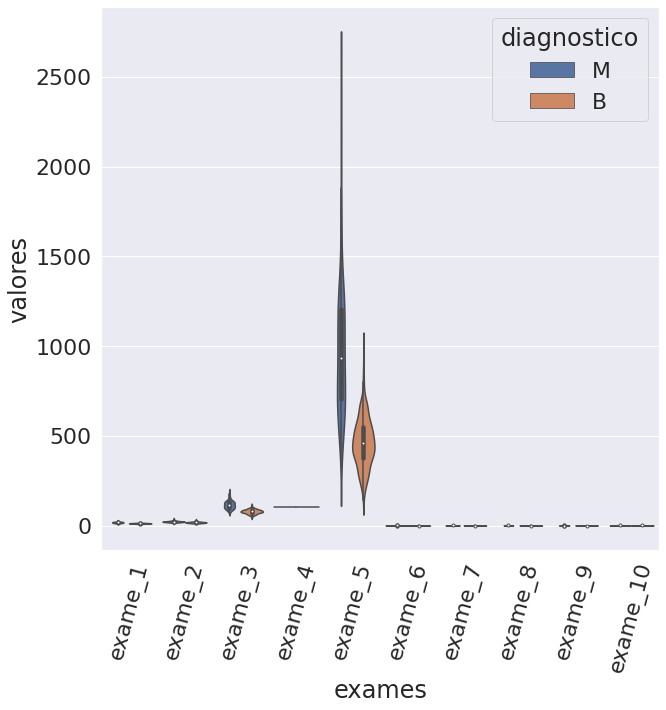

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')
plt.figure(figsize = (10,10))
plt.xticks(rotation = 75)



sns.violinplot(x= 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)

No código abaixo, foi usada a função StandardScaler para melhorar a visualização dos dados na representação gráfica, de onde já podemos tirar alguma informação e já nos chama atenção para o exame_4. O que ocorreu para a visualização ficar desse jeito?

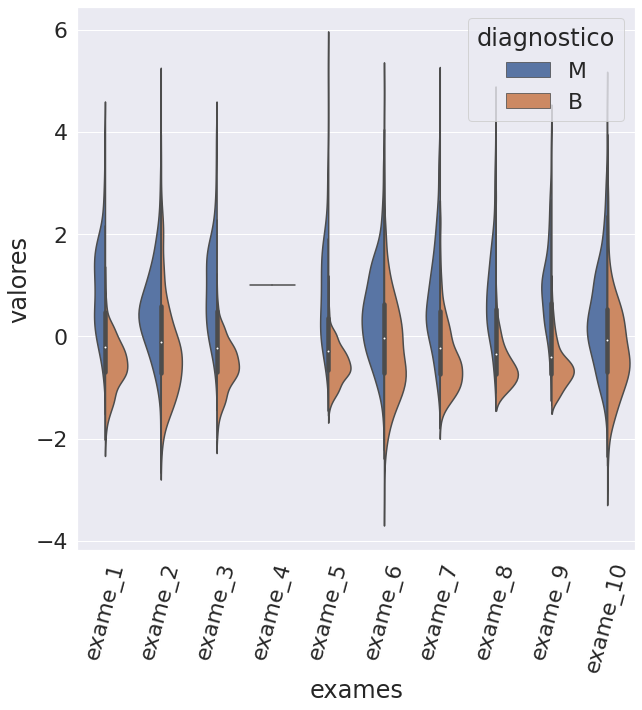

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')
plt.figure(figsize = (10,10))
plt.xticks(rotation = 75)



sns.violinplot(x= 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split=True)

In [ ]:
valores_exames_v2.exame_4

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

Identifiquei que os valores do exame_4 são constantes, sendo assim, o exame_4 não agrega em nada para o diagnóstico logo, a mesma deve ser eliminada do modelo.

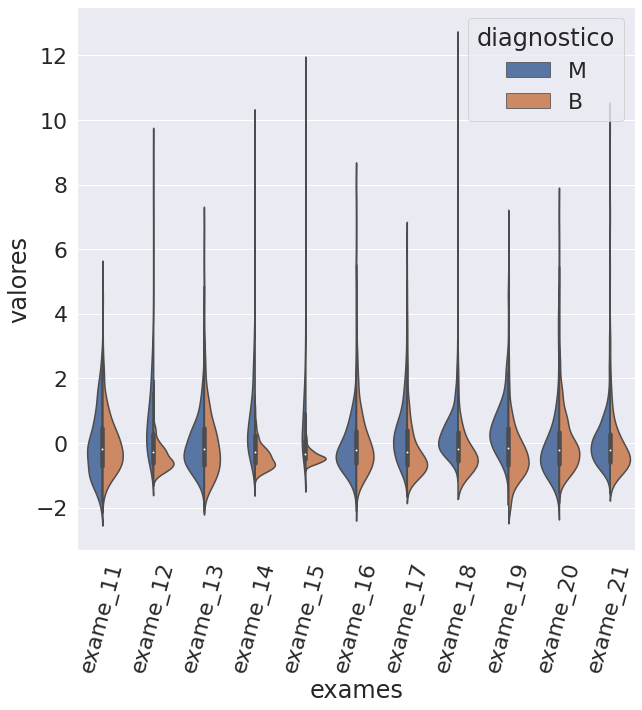

In [ ]:
def violino(valores, inicio , fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')
  plt.figure(figsize = (10,10))
  plt.xticks(rotation = 75)
  sns.violinplot(x= 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split=True)

violino(valores_exames_v2, 10, 21)

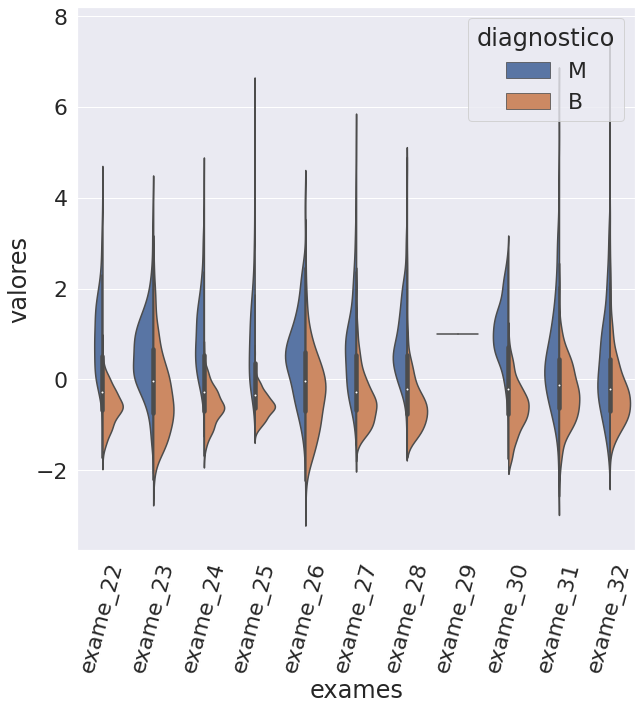

In [ ]:
violino(valores_exames_v2, 21, 32)

Após plotar os gráficos de todos os exames, pôde-se observar uma nova coluna na database com valores constantes. Agora, precisarei remover as colunas com valores constantes do modelo e rodar novamente o classificador. Para isso, criarei uma função.

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])

def classificar(valores):
  SEED = 1234
  random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y)

  print('Resultado da classificação %.2f%%' %(classificador.score(teste_x,teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação 92.98%


Agora se faz necessário verificar a correlação das variáveis. Para uma melhor visualização, vou criar um heatmap com os dados da matriz.

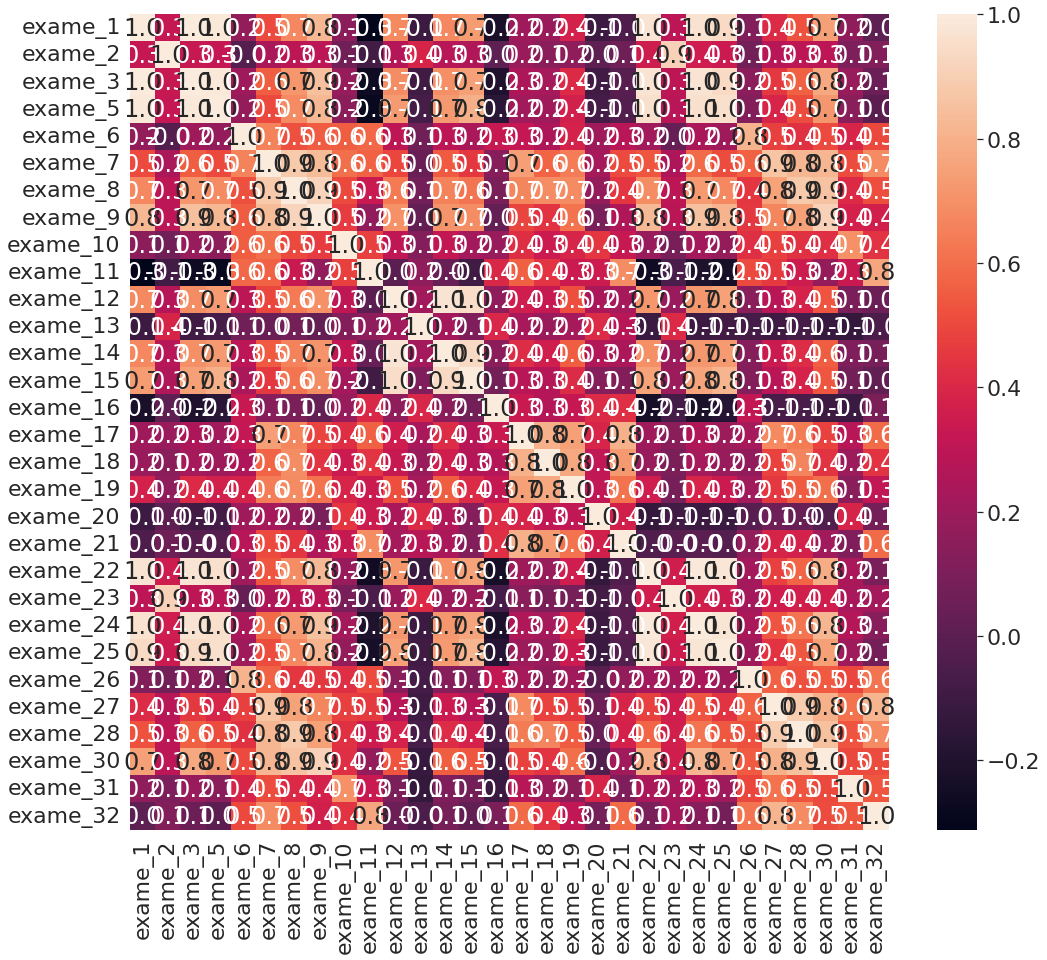

In [ ]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')

Na representação acima com o heatmap, fica fácil identificar os features com maior correlação. É observado que algumas features têm correlação 1.0, que quer dizer que as duas features tem os mesmos dados, sendo assim podemos remover uma delas evitando o retrabalho e mantendo a qualidade do classificador.

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aqui, mantive apenas as features que têm correlação de 1.0, para posterior remoção do modelo.

In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [ ]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

com uma somatória, podemos identificar as features distintas de alta correcionalidade.

In [ ]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Aqui, retiro as features de alta correcionalidade.

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


Após verificar que o resultado da correlação caiu, percebi que ao invés de excluir somente um lado da correcionalidade, excluí ambos. Precisei refazer a base, retirando somente um dos lados da correcionalidade

In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3','exame_24'])
classificar(valores_exames_v5)

Resultado da classificação 92.98%


Utilizando a biblioteca SelectKBest, tornei o processo de remoção de features mais automatizada e com um total de features de somente 5, sem a redução significativa do resultado da classificação.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)


In [ ]:
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f18083cc200>)

aqui, retornei à primeira database, por que a SelectKBest não aceita valores negativos. Tive que remover novamente as features que já haviam sido removidas. 

In [ ]:
valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

Agora só falta treinar o modelo novamente para rodar o classificador com as features reduzidas pelo KBest.

In [ ]:

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [ ]:
teste_kbest.shape

(171, 5)

In [ ]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)


print('Resultado da classificação %.2f%%' %(classificador.score(teste_kbest,teste_y)*100))

Resultado da classificação 92.40%


Como foram retirados vários dados do modelo, irei aplicar uma matriz de confusão, para saber se esses valores retirados não influenciarão em algum resultado. quero saber o quanto o modelo está acertando em casos de cânceres benignos e malignos.

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [ ]:
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

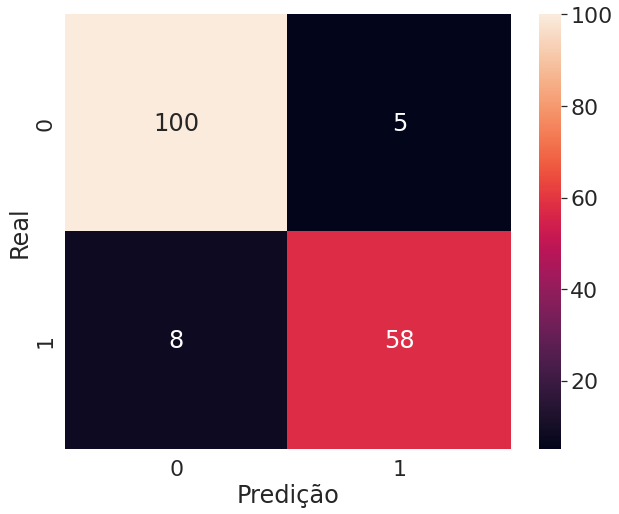

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Predição', ylabel = "Real")

Para comparação, utilizei a eliminação de camadas pelo método RFE, visando encontrar o modelo mais eficiente.

Resultado da classificação 87.13%


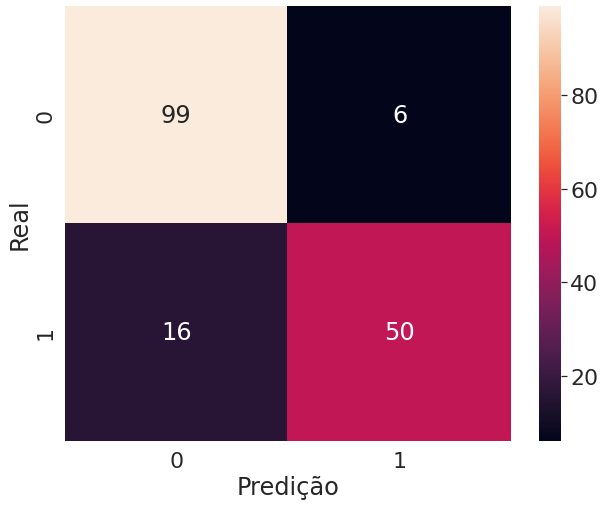

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico, test_size = 0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10,8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Predição', ylabel = "Real")

print('Resultado da classificação %.2f%%' %(classificador.score(teste_rfe,teste_y)*100))

Um terceiro método de aprendizagem, é o RFECV. Neste método, a própria biblioteca nos diz quantas camadas são necessárias para termos o modelo preditivo mais eficiente.

Resultado da classificação 92.98%


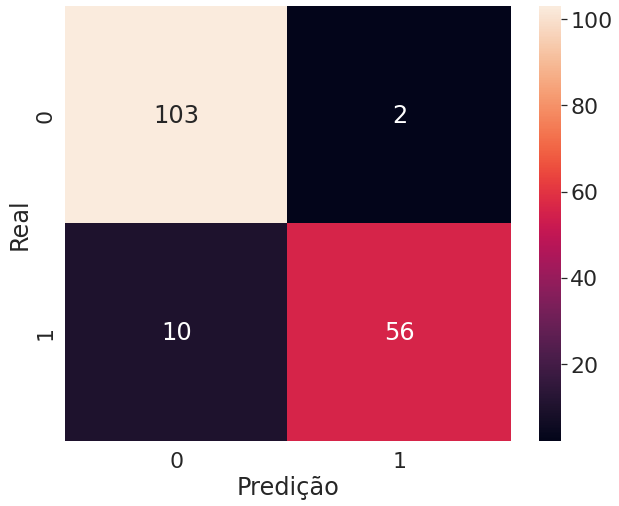

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring = 'accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10,8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Predição', ylabel = "Real")

print('Resultado da classificação %.2f%%' %(classificador.score(teste_rfecv,teste_y)*100))

In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
len(selecionador_rfecv.grid_scores_)

28

Na representação gráfica do RFECV, podemos identificar a quantidade de camadas necessárias para obtermos o melhor resultado.

<function matplotlib.pyplot.show>

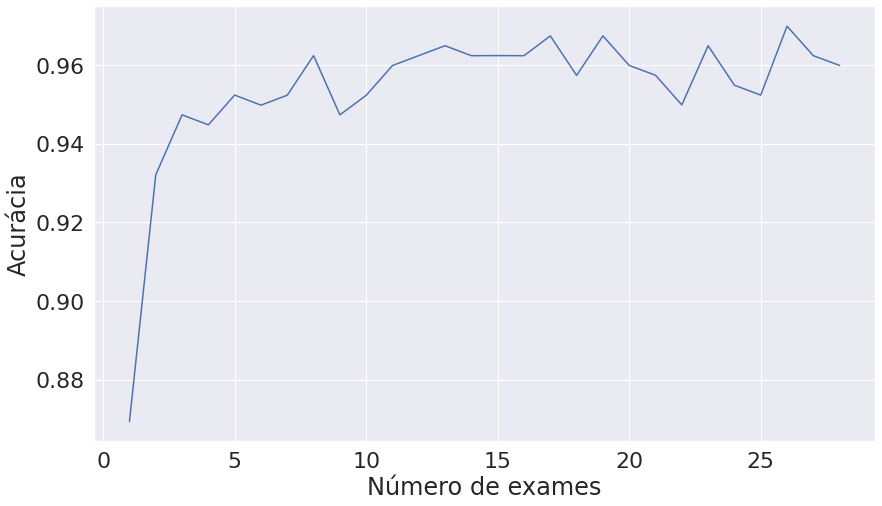

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.xlabel('Número de exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(selecionador_rfecv.grid_scores_)+1), selecionador_rfecv.grid_scores_)
plt.show


Quero colocar esta base de alta dimensionalidade, em um plano para a representação gráfica dos diagnósticos. Para isso, utilizarei duas bibliotecas para comparação do melhor modelo, a PCA e a T-NSE

In [ ]:
exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

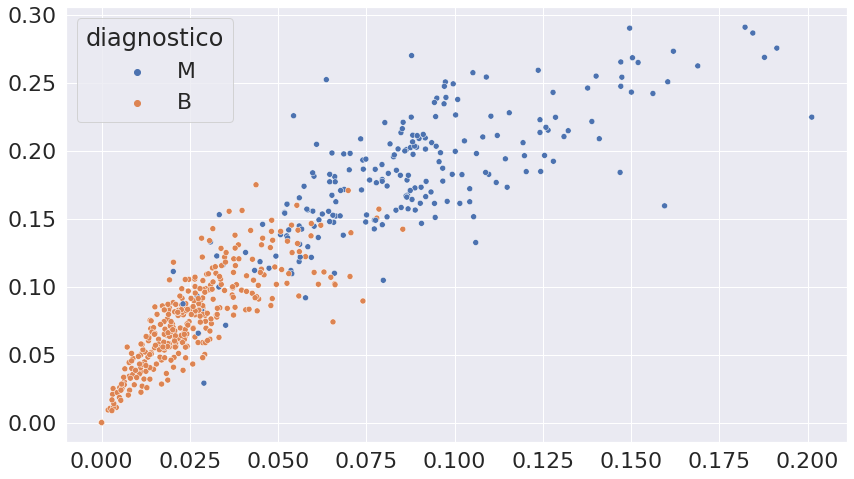

In [ ]:
import seaborn as StandardScaler
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue=diagnostico)

Na PCA, não conseguimos distinguir muito bem os exames executados, sendo assim, testei a T-NSE 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

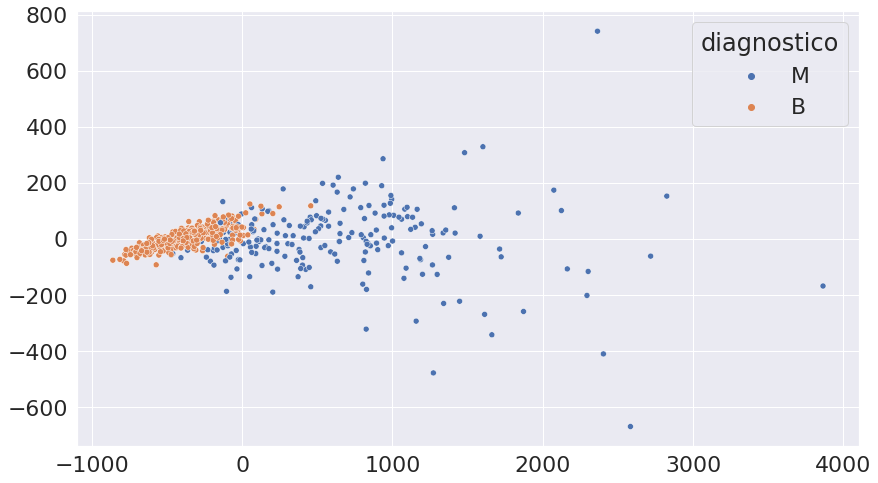

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue=diagnostico)

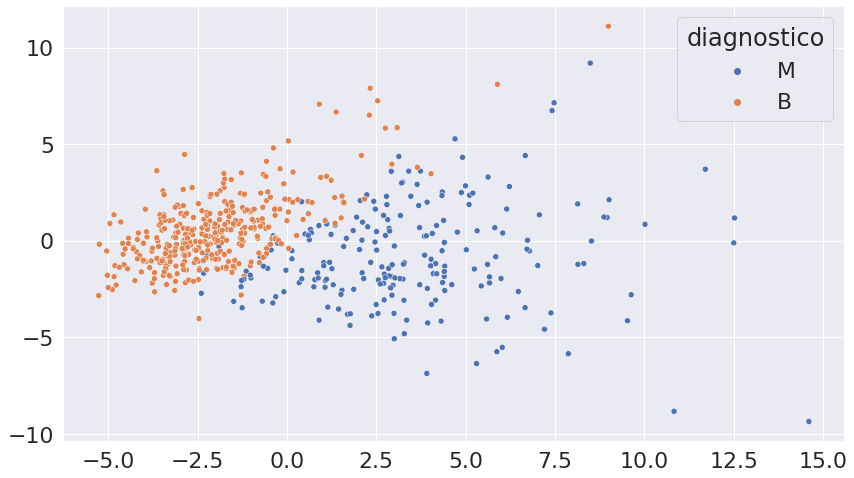

In [ ]:
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
valores_exames_v8
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue=diagnostico)

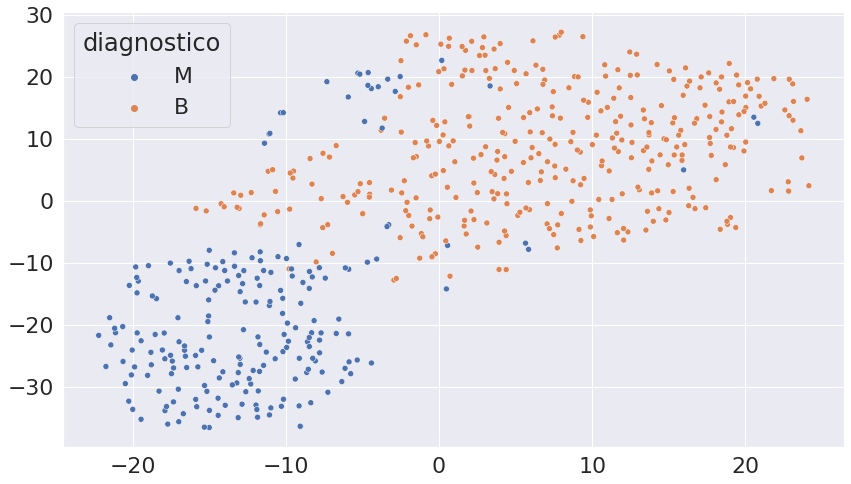

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
valores_exames_v9
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue=diagnostico)

Na T-NSE, temos um espalhamento melhor dos Diagnósticos, nos permitindo identificar claramente os cânceres maligno e benigno, além de uma zona de incerteza entre os dois diagnósticos.